# Tensorflow & Keras

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)
print(tf.config.list_physical_devices('GPU'))

2.8.0
2.8.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Scaling; 0~1 사이값으로 만들어줌
x_train, x_test = x_train/255, x_test/255

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [11]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0366 - accuracy: 0.9877
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0302 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0289 - accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9918
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0791 

[0.07909516990184784, 0.9819000363349915]

In [132]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

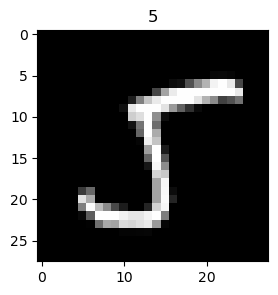

In [133]:
plt.figure(figsize=(3,3))
plt.imshow(image,cmap='gray')
plt.title(y_train[idx])
plt.show()

In [134]:
from PIL import Image

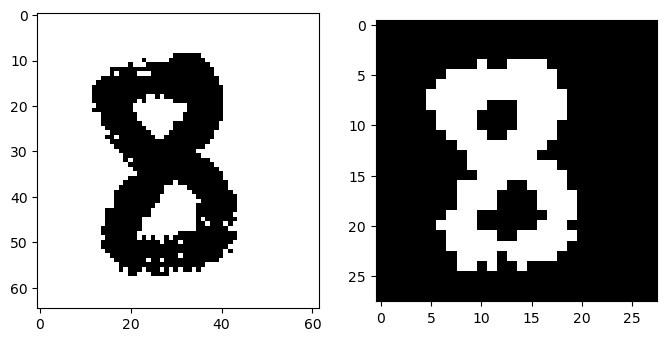

In [144]:
# Image file upload
cur_img = Image.open('./test.png')

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(cur_img)

# Image file resize 28x28
cur_img = cur_img.resize((28,28))

# Numpy array
image = np.asarray(cur_img)

# Color image -> Black & White image
try:
    image = np.mean(image, axis=2)
except:
    pass

#image = np.abs(255-image)
image = image.astype(np.float32)/255
ax[1].imshow(image, cmap='gray')
plt.show()

In [146]:
image = np.reshape(image, (1,28,28))
print(model.predict(image))
print("Model이 예측한 값은 {}입니다.".format(np.argmax(model.predict(image), -1)))

[[0.03433266 0.07693412 0.08990473 0.06237079 0.10262258 0.3402756
  0.04790547 0.15520084 0.0511623  0.03929093]]
Model이 예측한 값은 [5]입니다.


# Tensor

In [147]:
hello = tf.constant([3,3], dtype=tf.float32)
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [149]:
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [150]:
x_np = np.array([[1.0, 2.0],
                 [3.0, 4.0]])
x_list = [[1.0, 2.0],
          [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [151]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)
print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [153]:
type(x_np.numpy())

numpy.ndarray

In [155]:
a = tf.ones((2,3))
b = tf.zeros((2,3))
c = tf.fill((2,3), 2)

print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2 2]
 [2 2 2]], shape=(2, 3), dtype=int32)


In [156]:
# type까지 가져옴 (c: int32)
d = tf.zeros_like(c)
e = tf.ones_like(c)

print(d)
print(e)

tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)


In [157]:
f = tf.eye(3)
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [158]:
g = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [162]:
h = tf.random.uniform((2,2)) #np.rand; 0~1
i = tf.random.normal((2,2)) #np.randn; Normal Distribution
print(h)
print(i)

tf.Tensor(
[[0.9308704  0.19494915]
 [0.596822   0.04730356]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.50704616 -0.5105591 ]
 [ 0.00423312 -0.3742881 ]], shape=(2, 2), dtype=float32)


In [164]:
tensor = tf.random.normal((3,4))
print(f"Shape of tensor: {tensor.shape}")
print(f"DataType of tensor: {tensor.dtype}")

Shape of tensor: (3, 4)
DataType of tensor: <dtype: 'float32'>


In [165]:
tensor = tf.reshape(tensor, (4, 3))
tensor = tf.cast(tensor, tf.int32)
print(tensor)

tf.Tensor(
[[ 0  0  1]
 [ 0 -1 -1]
 [ 0  0  0]
 [ 0  0  1]], shape=(4, 3), dtype=int32)


### Variable
**Weight, Bias**

In [174]:
"""
tensor = tf.ones((3,4))
print(tensor)

tensor[0, 0] = 2.
"""

'\ntensor = tf.ones((3,4))\nprint(tensor)\n\ntensor[0, 0] = 2.\n'

In [175]:
with tf.device('/CPU:0'):
    variable = tf.Variable(tensor)
    print(variable)
    variable[0,0].assign(2)
    print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [176]:
initial_value = tf.random.normal(shape=(2, 2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.4319113 , -0.73187363],
       [-0.71342856,  1.3310363 ]], dtype=float32)>


In [179]:
weight = tf.Variable(tf.random_normal_initializer(stddev=1.)(shape=(2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.1467538 ,  0.07004265],
       [-0.03746337,  0.6260263 ]], dtype=float32)>


In [185]:
new_value = tf.random.normal(shape=(2,2))
print(new_value)
weight.assign(new_value)
print(weight)

tf.Tensor(
[[ 0.6687903  -1.0124316 ]
 [ 0.44220287  0.2347279 ]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.6687903 , -1.0124316 ],
       [ 0.44220287,  0.2347279 ]], dtype=float32)>


In [186]:
added_value = tf.ones(shape=(2,2))
weight.assign_add(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.6687903 , -0.01243162],
       [ 1.4422028 ,  1.2347279 ]], dtype=float32)>


In [187]:
subed_value = tf.ones(shape=(2,2))
weight.assign_sub(subed_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.66879034, -1.0124316 ],
       [ 0.4422028 ,  0.23472786]], dtype=float32)>


In [188]:
a = tf.range(1, 13)
a = tf.reshape(a, (3,4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [190]:
print(a[0])
print(a[0,-1])

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [192]:
print(a[0,:])
print(a[1:-1])

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)


In [196]:
a = tf.range(16)
a = tf.reshape(a, (2, 2, -1))
print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [197]:
b = tf.transpose(a, (2, 0, 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


In [204]:
x = tf.constant([[1,2],[3,4]], shape=(2,2), dtype='float32')
y = tf.constant([[5,6],[7,8]], dtype='float32')
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [206]:
print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x@y)

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857146 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [207]:
z = tf.range(1, 11)
z = tf.reshape(z, (2,5))
print(z)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [211]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [210]:
sum1 = tf.reduce_sum(z, axis=0)
sum2 = tf.reduce_sum(z, axis=1)
sum3 = tf.reduce_sum(z, axis=-1)
print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [212]:
concat = tf.concat([z, z], axis=0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [213]:
concat = tf.concat([z, z], axis=-1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [214]:
stack = tf.stack([z, z], axis=0)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [215]:
stack = tf.stack([z, z], axis=1)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 1  2  3  4  5]]

 [[ 6  7  8  9 10]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [216]:
stack = tf.stack([z, z], axis=2)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)


In [217]:
stack = tf.stack([z, z], axis=-1)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)
